Importing packages 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# scaler 
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler,QuantileTransformer, RobustScaler
#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras import Sequential
from keras.layers import Dense 


Importing dataset

In [2]:
df = pd.read_csv("BankRecords.csv")

### EDA

In [3]:
df.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [4]:
df.describe()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [6]:
df.isna().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

Unique values in Education column

In [7]:
df["Education"].unique()

array(['Diploma', 'Degree', 'Masters'], dtype=object)

In [8]:
# education_encoder = {
#   "Diploma" : 1,
#   "Degree" : 2,
#   "Masters" : 3
# }

# df["Education"] = df["Education"].map(education_encoder)

In [9]:
# binary_columns = ["Personal Loan", "Securities Account", "CD Account", "Online Banking", "CreditCard"]

# df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})

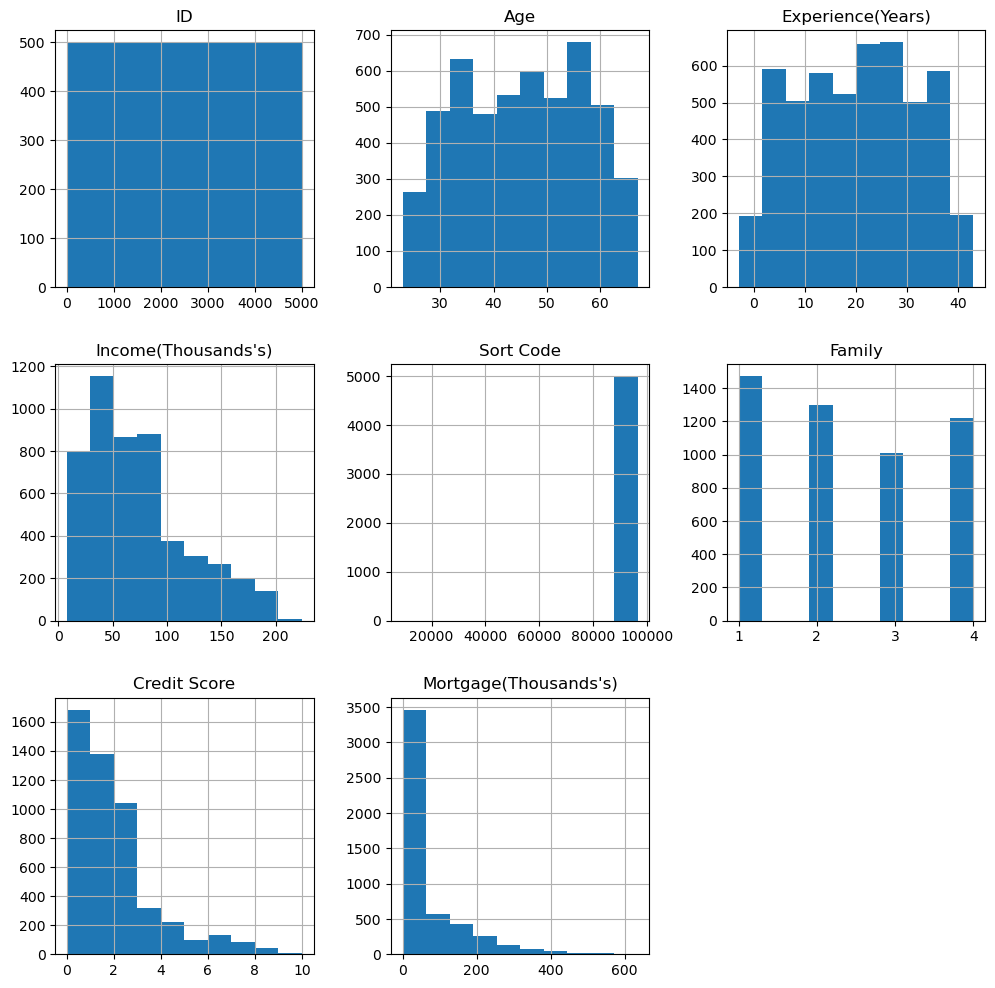

In [10]:
df.hist(figsize=(12,12))
plt.show()

From the graph above, we can determine that Credit Score, Sort Code, Mortgage and Income columns are left-skewed, the rest of the columns, except of ID, follow more Gaussian distribution. 

The following graph shows distribution of Education column across the dataset. We can observe that Diploma column contain close to 600 more records that the other two. 

<Axes: xlabel='Education', ylabel='count'>

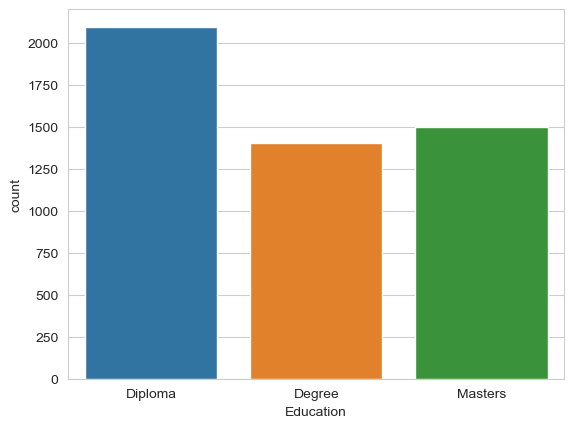

In [12]:
sns.countplot(data=df, x='Education')


Following graph, box plot of Experience, shows us minimum and maximum values in this columns, as well as that distribution between 25 th and 75th percentile ips concluded between 10 and 30 years of experience. With mean of this column falling at 20 years.

<Axes: ylabel='Experience(Years)'>

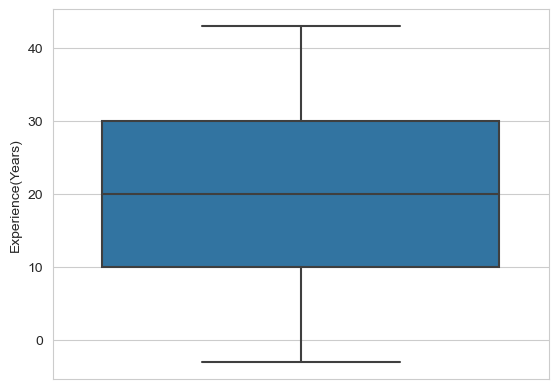

In [13]:
sns.boxplot(data=df, y='Experience(Years)')

<Axes: xlabel='Education', ylabel="Income(Thousands's)">

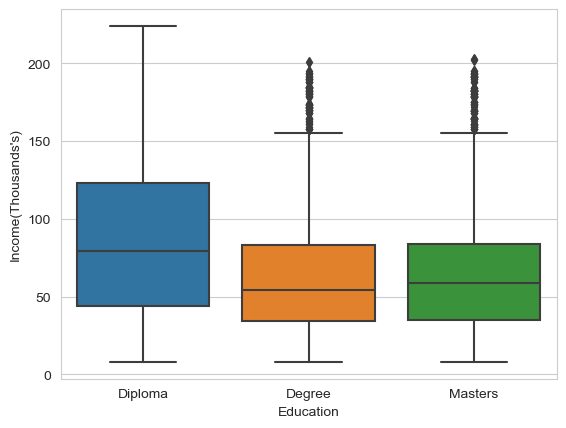

In [14]:
# Create a box plot for income by education level
sns.boxplot(data=df, x='Education', y="Income(Thousands's)")


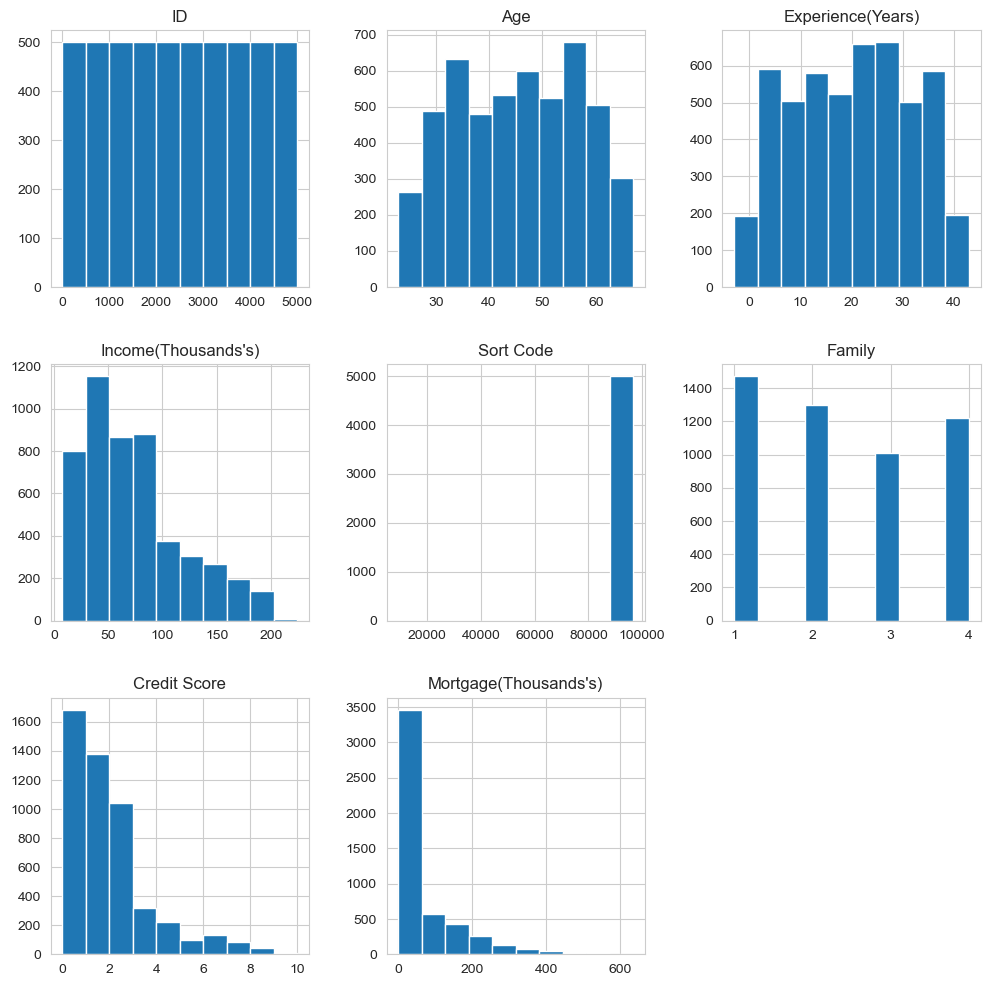

In [15]:
df.hist(figsize=(12,12))
plt.show()

c:\Users\rober\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


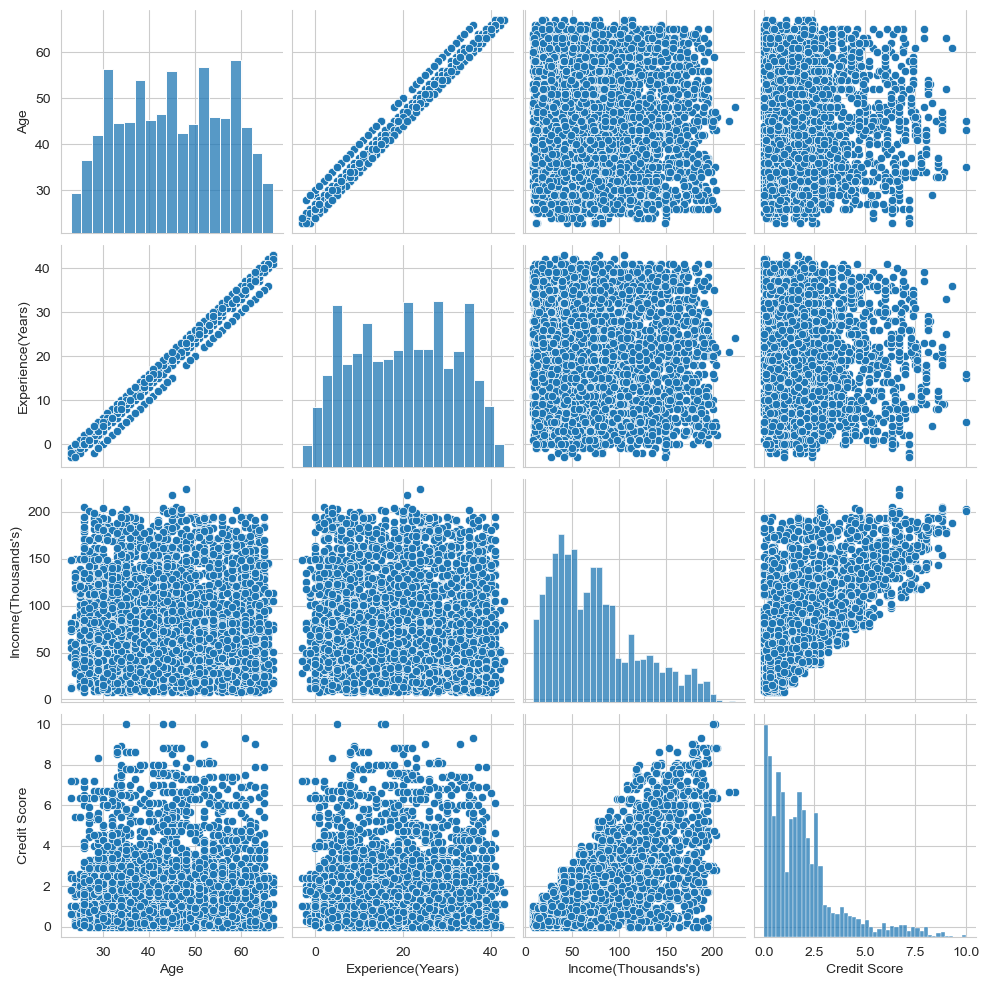

In [16]:
# Create a pair plot for numerical variables
sns.pairplot(df[["Age", "Experience(Years)","Income(Thousands's)", "Credit Score"]])


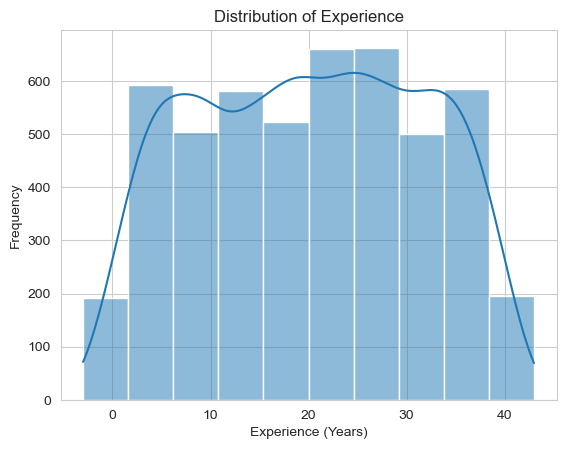

In [17]:
# Create a histogram for experience
sns.histplot(data=df, x='Experience(Years)', bins=10, kde=True)

# Add labels and title
plt.xlabel('Experience (Years)')
plt.ylabel('Frequency')
plt.title('Distribution of Experience')

# Show the plot
plt.show()


In [18]:
correlation_matrix = df.corr()
  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)


ValueError: could not convert string to float: 'Diploma'

"Family","Credit Score", "Education",Mortgage(Thousands's)","Personal Loan", "CD Account"
"Age","Experience(Years)","Family","Credit Score", "Education",Mortgage(Thousands's)","Personal Loan", "CD Account"

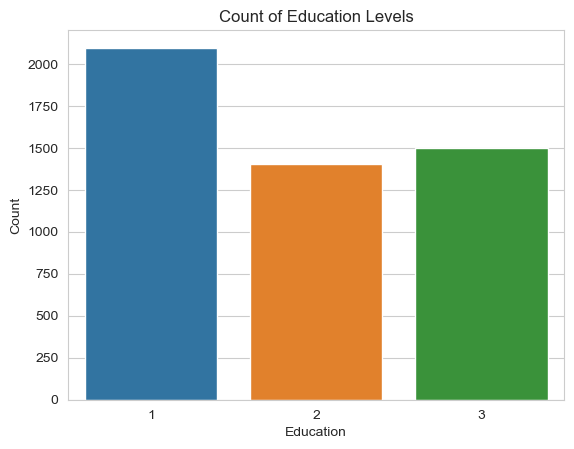

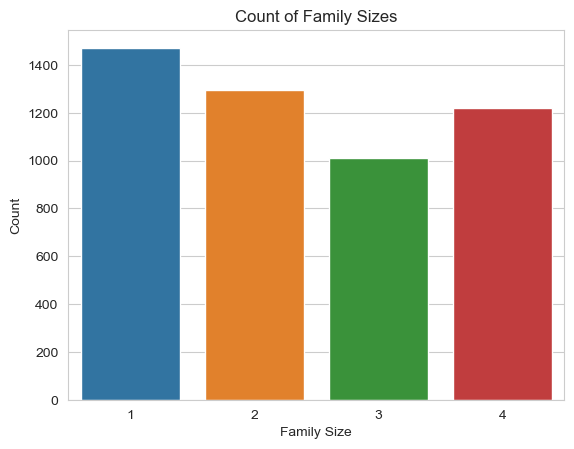

In [ ]:
# Create a count plot for education level
sns.countplot(data=df, x="Education")
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Count of Education Levels')
plt.show()

# Create a count plot for family size
sns.countplot(data=df, x="Family")
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Count of Family Sizes')
plt.show()


In [ ]:
# Calculate median experience for individuals with ages 23 to 29
median_exp_by_age = df.groupby("Age")["Experience(Years)"].median()

# Display median experience for each age group
print("Median experience by age:")
print(median_exp_by_age)


Median experience by age:
Age
23    -1.5
24    -1.0
25     0.0
26     1.0
27     2.0
28     3.0
29     4.0
30     5.0
31     5.0
32     7.0
33     8.0
34     9.0
35    10.0
36    11.0
37    12.0
38    13.0
39    14.0
40    15.0
41    16.0
42    17.0
43    18.0
44    19.0
45    20.0
46    21.0
47    22.0
48    23.0
49    24.0
50    25.0
51    26.0
52    27.0
53    28.0
54    29.0
55    30.0
56    31.0
57    32.0
58    33.0
59    34.0
60    35.0
61    36.0
62    37.0
63    38.0
64    39.0
65    40.0
66    41.0
67    42.0
Name: Experience(Years), dtype: float64


In [ ]:
# Calculate median experience for individuals with ages 23 to 29
median_exp_by_age = df[df["Experience(Years)"] >= 0].groupby("Age")["Experience(Years)"].median()

# Display median experience for each age group
print("Median experience by age:")
print(median_exp_by_age)



Median experience by age:
Age
24     0.0
25     1.0
26     1.0
27     2.0
28     3.0
29     4.0
30     5.0
31     5.0
32     7.0
33     8.0
34     9.0
35    10.0
36    11.0
37    12.0
38    13.0
39    14.0
40    15.0
41    16.0
42    17.0
43    18.0
44    19.0
45    20.0
46    21.0
47    22.0
48    23.0
49    24.0
50    25.0
51    26.0
52    27.0
53    28.0
54    29.0
55    30.0
56    31.0
57    32.0
58    33.0
59    34.0
60    35.0
61    36.0
62    37.0
63    38.0
64    39.0
65    40.0
66    41.0
67    42.0
Name: Experience(Years), dtype: float64


In [ ]:
# Filter the DataFrame to include only records where experience is larger than 0
filtered_df = df[(df["Experience(Years)"] <= 0) & (df["Income(Thousands's)"] > 0)]
# Count the number of records for each age group
age_group_counts = filtered_df.groupby("Age").size()

# Display the counts
print("Number of records for each age group where experience is smaller than 0:")
print(age_group_counts)


Number of records for each age group where experience is smaller than 0:
Age
23    12
24    28
25    35
26    29
27     8
28     1
29     4
30     1
dtype: int64


In [ ]:
# Group the DataFrame by age and count the number of records for each age
age_group_counts = df.groupby("Age").size()

# Display the counts
print("Number of records for each age group:")
print(age_group_counts)


Number of records for each age group:
Age
23     12
24     28
25     53
26     78
27     91
28    103
29    123
30    136
31    125
32    120
33    120
34    134
35    151
36    107
37    106
38    115
39    133
40    125
41    136
42    126
43    149
44    121
45    127
46    127
47    113
48    118
49    115
50    138
51    129
52    145
53    112
54    143
55    125
56    135
57    132
58    143
59    132
60    127
61    122
62    123
63    108
64     78
65     80
66     24
67     12
dtype: int64


### Data Manipulation

In [ ]:
# education_encoder = {
#   "Diploma" : 1,
#   "Degree" : 2,
#   "Masters" : 3
# }

# df["Education"] = df["Education"].map(education_encoder)

In [ ]:
# binary_columns = ["Personal Loan", "Securities Account", "CD Account", "Online Banking", "CreditCard"]

# df[binary_columns] = df[binary_columns].replace({"Yes": 1, "No": 0})

Drop ID column 

In [ ]:
df = df.drop(columns="ID")

In [ ]:
df.head()

,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Select columns that will be scaled

In [ ]:
numerical_columns = ["Age","Experience(Years)","Income(Thousands's)","Family","Credit Score","Mortgage(Thousands's)"]

In [ ]:
scaler = MinMaxScaler()
# scaler = PowerTransformer()
# scaler = QuantileTransformer(output_distribution='uniform')

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
df.head()

,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,0.045455,0.086957,0.189815,91107,1.000000,0.16,1,0.0,0,1,0,0,0
1,0.500000,0.478261,0.120370,90089,0.666667,0.15,1,0.0,0,1,0,0,0
2,0.363636,0.391304,0.013889,94720,0.000000,0.10,1,0.0,0,0,0,0,0
3,0.272727,0.260870,0.425926,94112,0.000000,0.27,2,0.0,0,0,0,0,0
4,0.272727,0.239130,0.171296,91330,1.000000,0.10,2,0.0,0,0,0,0,1


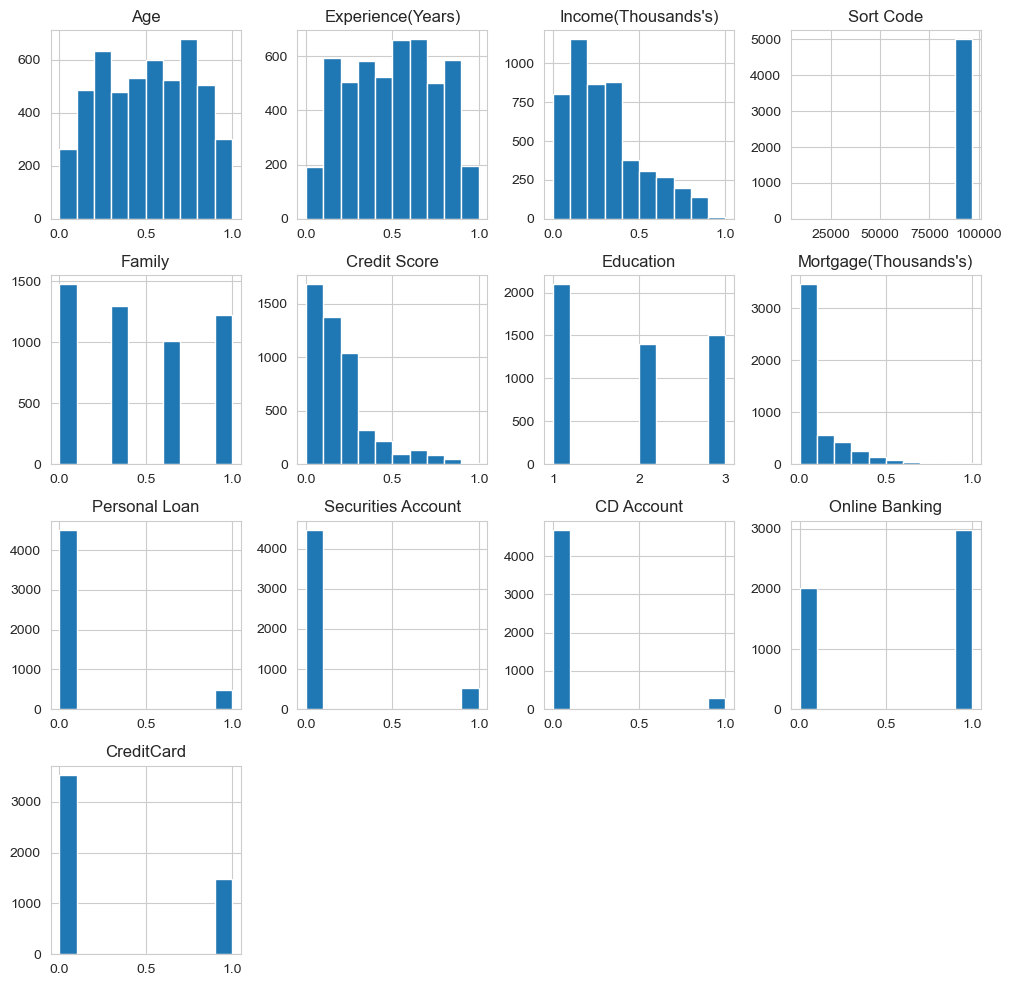

In [ ]:
df.hist(figsize=(12,12))
plt.show()


In [ ]:
# independent_variables = ["Age","Experience(Years)","Family","Credit Score", "Education","Mortgage(Thousands's)","Personal Loan", "CD Account"]
independent_variables = ["Age","Experience(Years)","Family","Credit Score","Education","Mortgage(Thousands's)",	"Personal Loan","Securities Account","CD Account","CreditCard"]
X = df[independent_variables]

y = df["Income(Thousands's)"]  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
fs = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

In [ ]:
from sklearn.ensemble import  RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print the MSE for each model
print("Mean Squared Error =", mse)

Mean Squared Error = 0.007709342414954361


In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# List of models to try
models = {
    'Support Vector Regressor': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet()
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    # Print the MSE for each model
    print(f"{name}: Mean Squared Error = {mse}")

Support Vector Regressor: Mean Squared Error = 0.01672791854000758
Decision Tree Regressor: Mean Squared Error = 0.013921661975118122
Gradient Boosting Regressor: Mean Squared Error = 0.01422221568876214
Ridge Regression: Mean Squared Error = 0.020269698066833545
Lasso Regression: Mean Squared Error = 0.045650235253772285
ElasticNet Regression: Mean Squared Error = 0.045650235253772285


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 200],  # Number of trees in the forest
#     'max_depth': [None, 10, 20],       # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
# }

# # Initialize the Random Forest Regressor
# rf = RandomForestRegressor(random_state=42)

# # Perform grid search to find the best hyperparameters
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Use the best model for prediction
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print("Best Random Forest Regressor - Mean Squared Error:", mse)


In [ ]:
best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor with specified parameters
model = RandomForestRegressor(**best_params)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict income values on the testing data
y_pred = model.predict(X_test)

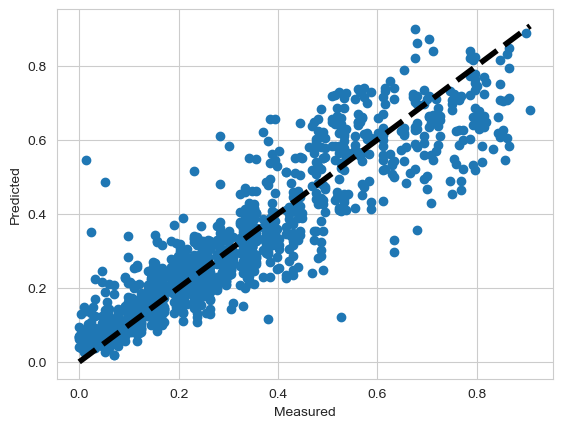

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--',
lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show() 

Validating Testing Set

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Random Forest Regressor - Mean Squared Error:", mse)
print("Random Forest Regressor - Mean Absolute Error:", mae)
print("Random Forest Regressor - Root Mean Squared Error:", np.sqrt(mse))


Random Forest Regressor - Mean Squared Error: 0.0077875768895448285
Random Forest Regressor - Mean Absolute Error: 0.06357260696983058
Random Forest Regressor - Root Mean Squared Error: 0.08824724862308642


Validation Training Set

In [ ]:
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
print("Random Forest Regressor over training set - Mean Squared Error:", mse_train)
print("Random Forest Regressor over training set - Mean Absolute Error:", mae_train)
print("Random Forest Regressor over training set - Root Mean Squared Error:", np.sqrt(mse_train))

Random Forest Regressor over training set - Mean Squared Error: 0.0013759850219001535
Random Forest Regressor over training set - Mean Absolute Error: 0.02589976915962978
Random Forest Regressor over training set - Root Mean Squared Error: 0.03709427209017793


### Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras.optimizers 

# # Define the neural network architecture
# model = keras.Sequential([
#     # layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     layers.Dense(32, activation='relu',kernel_initializer='he_uniform'),
#     layers.Dense(16, activation='relu'),
#     # layers.Dense(24, activation='relu'),
#     layers.Dense(1, activation='linear')  # Output layer with 1 neuron for regression
# ])

# opt = keras.optimizers.AdamW(learning_rate=0.01)
# model.compile(optimizer=opt, loss='mse', metrics=['mae'])
# # Define early stopping callback
# early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# # Train the model on the training data with early stopping
# history = model.fit(X_train, y_train, epochs=50, batch_size=60, validation_split=0.2)
# # history = model.fit(X_train, y_train, epochs=100, batch_size=60, validation_split=0.4, callbacks=[early_stopping])

# # Evaluate the model on the testing data
# loss_test, mae_test = model.evaluate(X_test, y_test)
# loss_train, mae_train = model.evaluate(X_train, y_train)
# print("Mean Squared Error Test:", loss_test)
# print("Mean Absolute Error Test:", mae_test)
# print("Root Mean Error Test:", np.sqrt(loss_test))
# print("------")
# print("Mean Squared Error Train:", loss_train)
# print("Mean Absolute Error Train:", mae_train)
# print("Root Mean Error Train:", np.sqrt(loss_train))


In [ ]:
X_train

,Age,Experience(Years),Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,CreditCard
4884,0.840909,0.804348,0.666667,0.22,3,0.000000,0,0,0,1
3163,0.636364,0.652174,0.333333,0.10,3,0.000000,0,0,0,0
490,0.250000,0.282609,0.333333,0.27,1,0.000000,0,0,0,0
862,0.613636,0.565217,0.333333,0.10,2,0.159055,0,0,0,0
1740,0.500000,0.500000,0.000000,0.24,1,0.000000,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
4426,0.227273,0.239130,0.000000,0.46,1,0.000000,0,0,0,0
466,0.045455,0.065217,0.333333,0.09,3,0.000000,0,0,0,0
3092,0.454545,0.456522,0.333333,0.04,1,0.511811,0,1,0,0
3772,0.272727,0.282609,0.333333,0.30,1,0.000000,0,0,0,0


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras.optimizers 

model = keras.Sequential([
    layers.Dense(10, activation='relu'),
    layers.Dense(8, activation='linear'), 
    layers.Dense(4, activation='linear'), 
    layers.Dense(2, activation='linear'),  
    layers.Dense(1, activation='relu'),
])


model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae','accuracy']) 



history = model.fit(X_train, y_train, epochs=200, batch_size=30, validation_split=0.3)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

# fig, ax = plt.subplots()
# ax.scatter(y_test, y_pred)
# ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--',
# lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show() 

Epoch 1/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0045 - loss: 0.1004 - mae: 0.2478 - val_accuracy: 0.0018 - val_loss: 0.0339 - val_mae: 0.1514
Epoch 2/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0063 - loss: 0.0329 - mae: 0.1462 - val_accuracy: 0.0018 - val_loss: 0.0226 - val_mae: 0.1204
Epoch 3/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0041 - loss: 0.0230 - mae: 0.1194 - val_accuracy: 0.0018 - val_loss: 0.0215 - val_mae: 0.1209
Epoch 4/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0049 - loss: 0.0210 - mae: 0.1146 - val_accuracy: 0.0018 - val_loss: 0.0190 - val_mae: 0.1105
Epoch 5/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0094 - loss: 0.0208 - mae: 0.1139 - val_accuracy: 0.0018 - val_loss: 0.0185 - val_mae: 0.1090
Epoch 6/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0062 - loss: 0.0212 - mae: 0.1158 - val_accuracy: 0.0018 - val_loss: 0.0187 - val_mae: 0.1104
Epoch 7/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

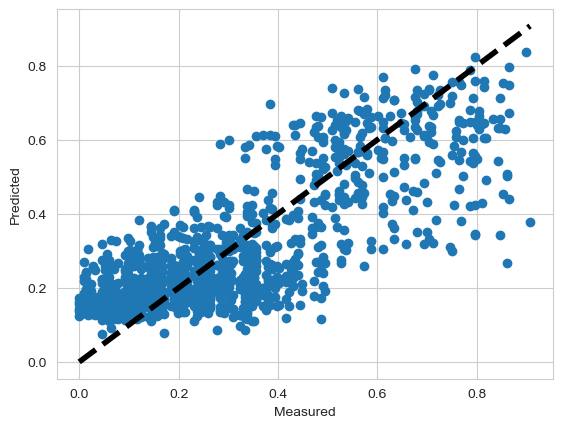

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--',
lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show() 

In [ ]:
# Define the number of samples
num_samples = 10


# Generate random values for each column
np.random.seed(42)  # For reproducibility

data = {
    "Age": np.random.randint(20, 70, size=num_samples),
    "Experience(Years)": [],
    "Family": np.random.randint(1, 5, size=num_samples),
    "Credit Score": np.round(np.random.uniform(0.5, 3.0, size=num_samples), 1),
    "Education": np.random.choice([1,2,3], size=num_samples),
    "Mortgage(Thousands's)": np.random.randint(0, 500, size=num_samples),
    "Personal Loan": np.random.choice([1,0], size=num_samples),
    "CD Account": np.random.choice([1,0], size=num_samples),
    "Estimated Income": [np.nan] * num_samples
}

experience = []

for age in data["Age"]:
    max = age - 18
    ex_r = np.random.randint(0,max)
    if max > 0:
        experience.append(ex_r)
    else:
        experience.append(0)

data["Experience(Years)"] = experience


# Create a DataFrame
users = pd.DataFrame(data)
users.head(10)

,Age,Experience(Years),Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,CD Account,Estimated Income
0,58,39,3,2.3,3,306,0,1,NaN
1,48,3,4,2.8,2,134,0,0,NaN
2,34,1,1,0.5,2,20,1,1,NaN
3,62,5,4,3.0,3,328,0,0,NaN
4,27,5,4,2.0,2,166,1,1,NaN
5,40,9,4,2.0,3,273,0,1,NaN
6,58,3,3,0.5,3,387,0,0,NaN
7,38,17,2,0.6,1,88,0,1,NaN
8,42,11,1,1.8,3,315,1,0,NaN
9,30,1,2,1.5,1,13,0,0,NaN


In [ ]:
numerical_columns = ['Age', 'Experience(Years)', 'Family', 'Credit Score', "Mortgage(Thousands's)"]

In [ ]:

scaler = MinMaxScaler()
users[numerical_columns] = scaler.fit_transform(users[numerical_columns])


# Prepare data for prediction
features = users.drop(columns="Estimated Income")

# Make predictions
predictions = model.predict(features)

# Set the 'Estimated Income' column with the predicted values
users["Estimated Income"] = predictions

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- CreditCard
- Securities Account


In [ ]:
numerical_columns = ['Age', 'Experience(Years)', 'Family', 'Credit Score', "Mortgage(Thousands's)"]

In [ ]:
users.head(10)

,Age,Experience(Years),Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,CD Account,Estimated Income
0,0.885714,0.214286,0.333333,0.000000,1,0.811828,0,0,0.830815
1,0.600000,0.523810,0.333333,0.041667,3,0.000000,1,0,0.619906
2,0.200000,0.809524,0.333333,0.541667,1,0.612903,0,0,0.521240
3,1.000000,0.904762,1.000000,0.416667,3,0.674731,1,0,0.858748
4,0.000000,0.523810,1.000000,0.041667,3,0.892473,0,0,0.718300
5,0.371429,0.023810,0.000000,1.000000,1,0.104839,1,0,0.774966
6,0.885714,0.476190,0.000000,0.250000,1,1.000000,1,0,0.655151
7,0.314286,0.000000,1.000000,0.083333,3,0.876344,0,0,0.810867
8,0.428571,0.523810,0.333333,0.625000,2,0.209677,1,0,0.652500
9,0.085714,1.000000,0.333333,0.416667,1,0.948925,0,0,0.734959


In [ ]:
users[numerical_columns] = scaler.inverse_transform(users[numerical_columns])


In [ ]:
users.head()

,Age,Experience(Years),Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,CD Account,Estimated Income
0,58.0,10.0,2.0,0.5,1,315.0,0,0,0.830815
1,48.0,23.0,2.0,0.6,3,13.0,1,0,0.619906
2,34.0,35.0,2.0,1.8,1,241.0,0,0,0.521240
3,62.0,39.0,4.0,1.5,3,264.0,1,0,0.858748
4,27.0,23.0,4.0,0.6,3,345.0,0,0,0.718300
